# A Look Into Regression

*Exploring wide receiver and tight end fantasy football data to determine if receiving yards and receiving touchdowns correlate. And buliding touchdown regression to help aid fantasy football owners in making roster decisions.*

### Exploratory Data Analysis

In [1]:
#First step: import needed libraries to explore and visualize the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

***Airyards.com*** data is easily digestable and readily usable. First step was to pull in these ***.csv*** files using the pandas library. NFL data for the past 8 years was used in this analysis.

In [2]:
#Using airyards.com data, bring in .csv files to python
air_yards_12 = pd.read_csv("airyards12.csv")
air_yards_13 = pd.read_csv("airyards13.csv")
air_yards_14 = pd.read_csv("airyards14.csv")
air_yards_15 = pd.read_csv("airyards15.csv")
air_yards_16 = pd.read_csv("airyards16.csv")
air_yards_17 = pd.read_csv("airyards17.csv")
air_yards_18 = pd.read_csv("airyards18.csv")
air_yards_19 = pd.read_csv("airyards19.csv")

Inspecting a few datasets reveals each set has 16 columns with varying rows corresponding to each wide receiver and tight end receiving data for that particular season.

In [3]:
air_yards_12.tail() #Inspect the bottom 5 rows of the dataset

,Unnamed: 0,full_name,position,team,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr
78,79,Jim Dray,TE,ARI,2,2,15,14,1,0,7.0,1.07,0.01,0.02,0.03,3.5
79,80,Andre Holmes,WR,DAL,2,2,11,24,3,0,12.0,0.46,0.02,0.01,0.03,3.1
80,81,Ted Ginn,WR,SF,2,2,1,-4,5,0,-2.0,-0.25,0.00,0.01,0.01,2.8
81,82,Josh Bellamy,WR,KC,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.00,0.0
82,83,Matthew Slater,WR,NE,0,0,0,13,0,0,inf,0.00,0.00,0.00,0.00,0.0


In [4]:
air_yards_13.head() #Inspect the top 5 rows of the dataset

,Unnamed: 0,full_name,position,team,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr
0,1,Demaryius Thomas,WR,DEN,142,92,1430,1385,707,14,9.8,1.03,0.27,0.21,0.50,319.0
1,2,Josh Gordon,WR,CLE,159,87,1646,2133,675,9,13.4,0.77,0.44,0.27,0.71,314.4
2,3,A.J. Green,WR,CIN,178,98,1426,2232,390,11,12.5,0.64,0.45,0.30,0.77,306.6
3,4,Jimmy Graham,TE,NO,142,86,1215,1366,406,16,9.6,0.89,0.27,0.22,0.52,303.5
4,5,Brandon Marshall,WR,CHI,164,100,1295,2000,279,12,12.2,0.65,0.40,0.28,0.70,301.5


The ***Unnamed*** column represents the ***ppr*** rank of each wide receiver/tight end for that year. The first column was renamed to reflect this description by using `.rename()`.

In [5]:
air_yards_12.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True) #.rename can accomplish this header name change
air_yards_13.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True)
air_yards_14.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True)
air_yards_15.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True)
air_yards_16.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True)
air_yards_17.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True)
air_yards_18.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True)
air_yards_19.rename(columns = {"Unnamed: 0" : "rank"}, inplace=True)
air_yards_19.head()

,rank,full_name,position,team,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr
0,1,Michael Thomas,WR,NO,185,149,1725,1488,583,9,8.0,1.16,0.40,0.32,0.75,374.6
1,2,Chris Godwin,WR,TB,121,86,1333,1301,577,9,10.8,1.02,0.23,0.22,0.49,274.1
2,3,Julio Jones,WR,ATL,157,99,1394,1913,364,6,12.2,0.73,0.37,0.25,0.63,274.1
3,4,Cooper Kupp,WR,LA,134,94,1161,1007,538,10,7.5,1.15,0.21,0.21,0.46,270.5
4,5,DeAndre Hopkins,WR,HOU,150,104,1165,1580,387,7,10.5,0.74,0.34,0.30,0.69,264.3


Using `pd.concat`, we can merge all the datasets together to use for our exploratory processess and analysis.

In [6]:
#Use pd.concat to merge data frames together
concat_df = pd.concat([air_yards_12, air_yards_13, air_yards_14, air_yards_15, air_yards_16,air_yards_17, air_yards_18, air_yards_19], ignore_index=True, sort=False)
concat_df.sort_values("full_name") #sort by name 

,rank,full_name,position,team,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr
1343,24,A.J. Brown,WR,TEN,84,52,1051,1107,465,8,13.2,0.95,0.29,0.19,0.48,217.1
1036,220,A.J. Derby,TE,MIA,9,2,20,95,18,0,10.6,0.21,0.14,0.11,0.26,4.0
941,125,A.J. Derby,TE,DEN,31,19,224,285,74,2,9.2,0.79,0.11,0.10,0.22,53.4
726,169,A.J. Derby,TE,DEN,20,16,160,135,50,0,6.8,1.19,0.06,0.09,0.18,32.0
806,249,A.J. Derby,TE,NE,0,0,0,0,0,0,NaN,NaN,0.00,0.00,0.00,0.0
595,38,A.J. Green,WR,CIN,100,66,964,1236,258,4,12.4,0.78,0.41,0.28,0.70,186.4
361,8,A.J. Green,WR,CIN,132,86,1297,1687,336,10,12.8,0.77,0.38,0.26,0.66,275.7
827,11,A.J. Green,WR,CIN,143,75,1078,1910,297,8,13.4,0.56,0.46,0.28,0.74,230.8
85,3,A.J. Green,WR,CIN,178,98,1426,2232,390,11,12.5,0.64,0.45,0.30,0.77,306.6
219,25,A.J. Green,WR,CIN,116,69,1041,1511,309,6,13.0,0.69,0.50,0.31,0.82,209.3


With so many rows (1634), I want to check for any null values and inspect data types and certain summary statistics. I created ***explore*** function to accomplish this. This exploratory and cleaning process aids in getting correct data to later perform accurate analysis.

In [7]:
def explore(df):
    exp_df = {}
    exp_df['max'] = df.max()
    exp_df['min'] = df.min()
    exp_df['mean'] = df.mean()
    exp_df['median'] = df.median()
    exp_df['null_sum'] = df.isnull().sum()
    exp_df['null_avg'] = df.isnull().mean()
    exp_df['dtypes'] = df.dtypes
    exp_df['count'] = df.count()
    
    return pd.DataFrame(exp_df)

explore(concat_df)

,max,min,mean,median,null_sum,null_avg,dtypes,count
adot,inf,-3,inf,9.70,42,0.025704,float64,1592
air_yards,2674,-13,526.641983,358.00,0,0.000000,int64,1634
full_name,Zay Jones,A.J. Brown,NaN,NaN,0,0.000000,object,1634
ms_air,0.74,-0.01,0.141438,0.12,0,0.000000,float64,1634
position,WR,TE,NaN,NaN,0,0.000000,object,1634
ppr,382.2,0,88.201958,62.60,0,0.000000,float64,1634
racr,inf,-86,inf,0.78,45,0.027540,float64,1589
rank,314,1,116.358017,105.00,0,0.000000,int64,1634
rec,149,0,31.492044,23.00,0,0.000000,int64,1634
rec_yards,1871,-4,397.146879,272.00,0,0.000000,int64,1634


Our data set consists of **int**, **float**, and **object** variables. Note that the ***count*** column does not sum to the same amount. We can see ***adot*** and ***racr*** have null values that we can replace with 0.  This can be accomplished by using `fillna()`.

In [8]:
concat_df["adot"] = concat_df["adot"].fillna(0) #changes NaN values to 0
concat_df["racr"] = concat_df["racr"].fillna(0) #changes Nan values to 0
concat_df.sort_values("full_name")

,rank,full_name,position,team,targets,rec,rec_yards,air_yards,yac,td,adot,racr,ms_air,tgt_share,wopr,ppr
1343,24,A.J. Brown,WR,TEN,84,52,1051,1107,465,8,13.2,0.95,0.29,0.19,0.48,217.1
1036,220,A.J. Derby,TE,MIA,9,2,20,95,18,0,10.6,0.21,0.14,0.11,0.26,4.0
941,125,A.J. Derby,TE,DEN,31,19,224,285,74,2,9.2,0.79,0.11,0.10,0.22,53.4
726,169,A.J. Derby,TE,DEN,20,16,160,135,50,0,6.8,1.19,0.06,0.09,0.18,32.0
806,249,A.J. Derby,TE,NE,0,0,0,0,0,0,0.0,0.00,0.00,0.00,0.00,0.0
595,38,A.J. Green,WR,CIN,100,66,964,1236,258,4,12.4,0.78,0.41,0.28,0.70,186.4
361,8,A.J. Green,WR,CIN,132,86,1297,1687,336,10,12.8,0.77,0.38,0.26,0.66,275.7
827,11,A.J. Green,WR,CIN,143,75,1078,1910,297,8,13.4,0.56,0.46,0.28,0.74,230.8
85,3,A.J. Green,WR,CIN,178,98,1426,2232,390,11,12.5,0.64,0.45,0.30,0.77,306.6
219,25,A.J. Green,WR,CIN,116,69,1041,1511,309,6,13.0,0.69,0.50,0.31,0.82,209.3


Re-casting our function **explore** should show that our ***count*** column's values are all similar and our null sum and average should now all be 0.

In [9]:
#Cast explore to check to see if we have rid ourselves of our null values
explore(concat_df)

,max,min,mean,median,null_sum,null_avg,dtypes,count
adot,inf,-3,inf,9.60,0,0.0,float64,1634
air_yards,2674,-13,526.641983,358.00,0,0.0,int64,1634
full_name,Zay Jones,A.J. Brown,NaN,NaN,0,0.0,object,1634
ms_air,0.74,-0.01,0.141438,0.12,0,0.0,float64,1634
position,WR,TE,NaN,NaN,0,0.0,object,1634
ppr,382.2,0,88.201958,62.60,0,0.0,float64,1634
racr,inf,-86,inf,0.78,0,0.0,float64,1634
rank,314,1,116.358017,105.00,0,0.0,int64,1634
rec,149,0,31.492044,23.00,0,0.0,int64,1634
rec_yards,1871,-4,397.146879,272.00,0,0.0,int64,1634


Now that we have explored our dataset and corrected our null values, we can group the dataset by name and determine if touchdowns and receiving yards correlate. We will separate wide receivers and tight ends in our analysis. Let us first begin with wide receivers:

---

## Wide Receiver - Receiving Yards to Touchdown Correlation

Let's first parse out only the wide receivers from our combined dataset and group by name followed by summation.

In [10]:
#Parse out WR data and then group by name to determine summation of yards and touchdowns
wr_total_df = concat_df[(concat_df.position == "WR")].groupby("full_name").sum()#group by name then total column values
wr_total_df[["rec_yards", "td", "ppr"]].sort_values("rec_yards", ascending = False).head(20)

,rec_yards,td,ppr
full_name,,,
Julio Jones,11144,48,2150.6
Antonio Brown,9847,72,2172.5
Demaryius Thomas,8931,57,1904.1
DeAndre Hopkins,8613,54,1818.4
T.Y. Hilton,8579,44,1678.1
A.J. Green,7839,56,1659.9
Larry Fitzgerald,7428,47,1709.7
Golden Tate,7258,41,1593.6
Emmanuel Sanders,7130,38,1508.3


Using our summmation, we can graph ***rec_yards*** to ***td*** to see if a correlation exists. Seaborn's `.lmplot` makes for an easy to understand visualization. 

Text(10.049999999999997, 0.5, 'Touchdowns')

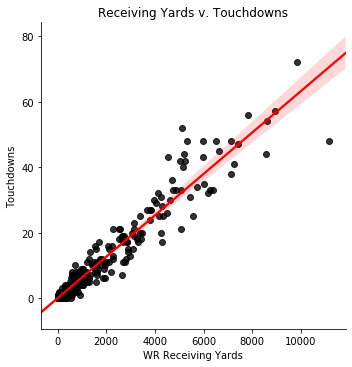

In [11]:
# Use lmplot from seaborn library to plot
sns.lmplot(x="rec_yards", y="td", data=wr_total_df, scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
                                                    #Red and black for Julio Jones
plt.gca().set_title("Receiving Yards v. Touchdowns")
plt.xlabel("WR Receiving Yards")
plt.ylabel("Touchdowns")

An obvious correlation exists. Use `LinearRegression()` to model relationship between ***rec_yards*** and ***td***. We can score the model to get our R^2 value for wide receivers. 

In [12]:
# Use linear regression to see rec_yards and td correlation
model_rec_td = LinearRegression()
model_rec_td.fit(X = wr_total_df[["rec_yards"]], y = wr_total_df.td) #x value is receiving yards and y value is td
print(model_rec_td.score(X = wr_total_df[["rec_yards"]], y = wr_total_df.td)) #scores the model, shows R^2 value

0.9269301679611535


Our WR **R^2** value is approx. **0.927**, proving a strong correlation between receving yards and touchdowns. We can calculate an average of how many receiving yards leads to a single touchdown.

In [13]:
# Find how many WR receiving yards leads to a TD to use for td_regression model
wr_total_rec_yards = wr_total_df.rec_yards.sum() #sums receiving yards column
wr_total_rec_td = wr_total_df.td.sum()
wr_ratio = wr_total_rec_yards/wr_total_rec_td
wr_ratio #this ratio is the average amount of WR receiving yards that correlates to one receiving touchdown

158.35492312724892

A wide receiver scores a TD on, approximately, every **159** receiving yards.

Now let's look at Tight Ends:

---

## Tight End - Receiving Yards to Touchdown Correlation

We will parse out only tight end data and group by name followed by summation.

In [14]:
#Parse out TE data and then group by name to determine summation of yards and touchdowns
te_total_df = concat_df[(concat_df.position == "TE")].groupby("full_name").sum()#group by name then total column values
te_total_df[["rec_yards", "td", "ppr"]].sort_values("rec_yards", ascending = False).head(20)

,rec_yards,td,ppr
full_name,,,
Travis Kelce,6459,37,1379.5
Jimmy Graham,6211,58,1487.1
Greg Olsen,5923,34,1275.3
Zach Ertz,5733,35,1307.3
Rob Gronkowski,5305,49,1166.5
Jared Cook,4978,31,1065.8
Delanie Walker,4762,31,1074.7
Jason Witten,4495,26,1060.5
Kyle Rudolph,3905,44,1053.5


Again, Seaborn's `.lmplot` makes for an easy to understand correlation graphic.

Text(10.049999999999997, 0.5, 'Touchdowns')

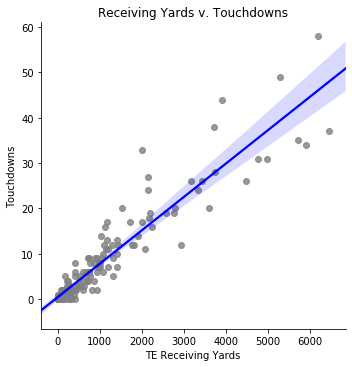

In [15]:
#Use lmplot from seaborn library to plot
sns.lmplot(x="rec_yards", y="td", data=te_total_df, scatter_kws={'color': 'gray'}, line_kws={'color': 'blue'}) 
                                                    #gray and blue for Rob Gronkowski
plt.gca().set_title("Receiving Yards v. Touchdowns")
plt.xlabel("TE Receiving Yards")
plt.ylabel("Touchdowns")

As we found out earlier, receiving yards and touchdowns correlate, which is reinforced looking at this tight end specific plot. Use `LinearRegression()` to model a relationship between ***rec_yards*** and ***td***. We can score the model to get our R^2 value for tight ends.

In [16]:
# Use linear regression to see rec_yards and td correlation for tight ends
model_rec_td = LinearRegression()
model_rec_td.fit(X = te_total_df[["rec_yards"]], y = te_total_df.td) #x value is receiving yards and y value is td
print(model_rec_td.score(X = te_total_df[["rec_yards"]], y = te_total_df.td)) #scores the model, shows R^2 value

0.8805433215650749


Our TE **R^2** value is approx. **0.881** showing a strong correlation. Let us now calculate an average of receiving yards to touchdowns for tight ends.

In [17]:
# Find how many TE receiving yards leads to a TD to use for td_regression model
te_total_rec_yards = te_total_df.rec_yards.sum() #sums receiving yards column
te_total_rec_td = te_total_df.td.sum()
te_ratio = te_total_rec_yards/te_total_rec_td
te_ratio #this ratio is the average amount of TE receiving yards that correlates to one receiving touchdown

128.58580343213728

A tight end scores a TD on, approximately, every **129** receiving yards. 

Now let's build our regression rate:

---

## Determining Touchdown Regression Rate

Now that we know that receiving yards and tochdowns correlate strongly, we can make a function to determine a player's touchdown regression rate. We need to be sure to use the right receiving yards/touchdown ratio depeding on the player's position (WR or TE). The average wide receiver scores a touchdown on approximately every 159 receiving yards. The average tight end scores a touchdown on approximately every 129 receiving yards. Let us build two functions:

+ **The first function *positional* will take in two variables (a dataframe and a string) and return the correct postional sorted dataframe. The string - "pos" is the corresponding position we wish to investigate (WR or TE).**
+ **The second function *regression_air_yards* will take in two variables (a dataframe and the corresponding positional td_ratio). This function creates a column and calculates the touchdown regression rate for each player for a given year. 

Running *positional* as the dataframe in *regression_air_yards* outputs our sorted dataframe with corresponding touchdown regression rate column. The only values we input are: 
1. dataframe year
2. position 
3. positional ratio

In [18]:
#Define a function positional to pull in the wanted dataset and filter out unwanted positional players
def positional(air_yards_table, pos):
    if (pos == "WR"):
        hold = air_yards_table.loc[(air_yards_table.position == "WR")].copy()#Make copy to avoid "SettingwithCopyWarning"
    else:
        hold = air_yards_table.loc[(air_yards_table.position == "TE")].copy()
    return hold


#We can now define a function that take in our dataframe made from "positional" and calculate the td regression rate
def regression_air_yards(df, td_ratio):
    df['td_reg_rate'] = df['td'] - df['rec_yards']/td_ratio
    touchdowns = df[[
        "full_name", 
        "position",
        "targets",
        "rec_yards",
        "adot",
        "td",
        "tgt_share",
        "ppr",
        "td_reg_rate"
    ]].sort_values('td_reg_rate', ascending=True)
    return touchdowns

test = regression_air_yards(positional(air_yards_18, "WR"),wr_ratio) #input needed values to "positional" and
                                                                     #the needed corresponding postional td_ratio
test.head(10)

,full_name,position,targets,rec_yards,adot,td,tgt_share,ppr,td_reg_rate
2,Julio Jones,WR,169,1655,14.3,7,0.28,320.7,-3.451206
53,Willie Snead,WR,95,649,8.2,1,0.18,134.2,-3.098389
37,D.J. Moore,WR,83,788,9.8,2,0.15,163.0,-2.976164
16,T.Y. Hilton,WR,118,1248,11.1,5,0.22,228.8,-2.881031
67,Danny Amendola,WR,76,565,7.9,1,0.18,119.3,-2.567935
15,Brandin Cooks,WR,116,1191,12.7,5,0.22,240.2,-2.521080
14,Keenan Allen,WR,137,1188,8.6,5,0.29,252.3,-2.502135
42,Taylor Gabriel,WR,91,689,11.5,2,0.18,153.0,-2.350986
91,Keelan Cole,WR,67,491,9.9,1,0.15,93.1,-2.100630
21,Jarvis Landry,WR,145,958,11.9,4,0.26,211.8,-2.049701


Using 2018 as our example, we see that Julio Jones should have scored approx. 3.5 more touchdowns than he did. This statistic can help fantasy owners determine who to trade for or who to trade away. It can help owners decide who to play in any given week and who is underperforming or overperforming in the touchdown column. This statistc, seemingly simple, can be a powerful contributor in determining player acquisition and answering start/sit questions.

Now for aesthetics. Seaborn allows us to visualize columns with color conditional formatting. Using `.diverging_palette` allows us to display positive and negative touchdown candidates with simple visuals. ***This may not appear in github.***

In [19]:
# We can use conditional formatting and seaborn colormap to better visualize our data
pos_lp = sns.diverging_palette(220,20, as_cmap=True) #220 and 20 relates to colors

(test[(test.td_reg_rate < 0)][["full_name", "td_reg_rate"]] #those underscoring the average
  .head(35)
  .style
  .background_gradient(cmap=pos_lp, subset=["td_reg_rate"])
  .set_caption("Positive Touchdown Regression Candidates")
  .format({"td_reg_rate": "{:.3}"}) #only relay two decimals
)

,full_name,td_reg_rate
2,Julio Jones,-3.45
53,Willie Snead,-3.1
37,D.J. Moore,-2.98
16,T.Y. Hilton,-2.88
67,Danny Amendola,-2.57
15,Brandin Cooks,-2.52
14,Keenan Allen,-2.5
42,Taylor Gabriel,-2.35
91,Keelan Cole,-2.1
21,Jarvis Landry,-2.05


In [20]:
neg_lp = sns.diverging_palette(100, 40, as_cmap=True) #100 and 40 relates to color

(test[(test.td_reg_rate > 0)][["full_name", "td_reg_rate"]] #those outscoring the average
  .sort_values("td_reg_rate", ascending=False) #Must sort by descending to flip the column
  .head(35)
  .style
  .background_gradient(cmap=neg_lp, subset=["td_reg_rate"])
  .set_caption("Negative Touchdown Regression Candidates")
  .format({"td_reg_rate": "{:.3}"}) #only relay two decimals
)

,full_name,td_reg_rate
3,Antonio Brown,6.96
32,Mike Williams,5.81
100,John Ross,5.67
23,Calvin Ridley,4.85
70,Anthony Miller,4.42
1,Davante Adams,4.35
133,Jaron Brown,3.95
19,Tyler Lockett,3.87
90,Chris Conley,2.95
60,Cooper Kupp,2.65


The function ***regression_air_yards*** takes the conclusive dataset from function ***positional***  and the previous calculated corresponding positional touchdown ratio and determines how many more touchdowns a wide receiver/tight end should have based off the averages of 8 years worth of receiving data. We can determine positive and negative regression candidates through this calculation. Having found a strong correlation between receiving yards and receiving touchdowns, we know that, on average, a receiver scores one touchdown on every 159 receiving yards and a tight end scores one touchdown on every 129 receiving yards. If a receiver is likely to get a similar amount of usage/work, it is fair to think that the positive touchdown candidates should, at some point, score touchdowns, which aids in fantasy point accumulation. An important thing to keep in mind - a touchdown regression rate is NOT an overcorrection. 

An example for future use: let us say that after week 4 of the 2020 season, JuJu Smith-Schuster has a ***td_reg_rate*** of approx. -3. This value tells us that, based off his receiving yards, he is underperforming (as it relates to an average wide receiver) by 3 touchdowns. If he continues to get similar work and produces similar yardage, he should begin to score touchdowns. It does not mean we should expect a 3 touchdown game in week 5 from JuJu. But that he should eventually regress to the mean and begin to start scoring touchdowns more to the average of 159 receiving yards per one touchdown. 

Of course there are many factors that can drive touchdown success rate but, knowing the correlation of receiving yards to receiving touchdowns and knowing that touchdowns regress aids fantasy football owners in making executive decisions about their lineup.